The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

### EDA
Define attribute description

        loan_id                 : Unique id of each observation (Interger)	
    number of dependents        : Number of Dependents of the Applicant (Numerical)
    education                   : Education of the Applicant - having own business or not (catergorical)
    self-employed               : Employment Status of the Applicant (catergorical)
    income_annum                : Annual Income of the Applicant (numerical)
    loan_amount                 : Loan Amount (numerical)
    loan_term                   : Loan Term in Years (numerical)
    cibil_score                 : Credit Score (numerical)
    residential_assets_value    : Resident assets value of applicant (numerical)
    commercial_assets_value     : Commercial assets value of applicant (numercial)
    luxury_assets_value         : Luxury assets value of applicant (numerical)
    bank_asset_value            :  Bank assets value of applicant (Numerical)
    
    
    loan_status (dependent variable) : status of loan (Catergorical)



In [159]:
## Importing data using the  libraries : numpy,pandas, matplotlib.pyplot,seaborn,pycaret
## Importing Support Vector Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as pr
from sklearn.svm import SVC
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *

In [160]:
## Structure of data
data = pd.read_csv('C:\\Users\\asus\\Downloads\\loan_approval_dataset.csv',index_col=0)
data.head()

no_of_dependents      education  self_employed   income_annum  \
loan_id                                                                   
1                        2       Graduate             No        9600000   
2                        0   Not Graduate            Yes        4100000   
3                        3       Graduate             No        9100000   
4                        3       Graduate             No        8200000   
5                        5   Not Graduate            Yes        9800000   

          loan_amount   loan_term   cibil_score   residential_assets_value  \
loan_id                                                                      
1            29900000          12           778                    2400000   
2            12200000           8           417                    2700000   
3            29700000          20           506                    7100000   
4            30700000           8           467                   18200000   
5            24200000          20           382                   12400000   

          commercial_assets_value   luxury_assets_value   bank_asset_value  \
loan_id                                                                      
1                        17600000              22700000            8000000   
2                         2200000               8800000            3300000   
3                         4500000              33300000           12800000   
4                         3300000              23300000            7900000   
5                         8200000              29400000            5000000   

         loan_status  
loan_id               
1           Approved  
2           Rejected  
3           Rejected  
4           Rejected  
5           Rejected

In [161]:
#Checking missing value and duplicated value of the data
data.isnull().sum()
data.duplicated().sum()


0

In [162]:
#Show the statistic description of the data set
data.describe()

no_of_dependents   income_annum   loan_amount    loan_term  \
count        4269.000000   4.269000e+03  4.269000e+03  4269.000000   
mean            2.498712   5.059124e+06  1.513345e+07    10.900445   
std             1.695910   2.806840e+06  9.043363e+06     5.709187   
min             0.000000   2.000000e+05  3.000000e+05     2.000000   
25%             1.000000   2.700000e+06  7.700000e+06     6.000000   
50%             3.000000   5.100000e+06  1.450000e+07    10.000000   
75%             4.000000   7.500000e+06  2.150000e+07    16.000000   
max             5.000000   9.900000e+06  3.950000e+07    20.000000   

        cibil_score   residential_assets_value   commercial_assets_value  \
count   4269.000000               4.269000e+03              4.269000e+03   
mean     599.936051               7.472617e+06              4.973155e+06   
std      172.430401               6.503637e+06              4.388966e+06   
min      300.000000              -1.000000e+05              0.000000e+00   
25%      453.000000               2.200000e+06              1.300000e+06   
50%      600.000000               5.600000e+06              3.700000e+06   
75%      748.000000               1.130000e+07              7.600000e+06   
max      900.000000               2.910000e+07              1.940000e+07   

        luxury_assets_value   bank_asset_value  
count          4.269000e+03       4.269000e+03  
mean           1.512631e+07       4.976692e+06  
std            9.103754e+06       3.250185e+06  
min            3.000000e+05       0.000000e+00  
25%            7.500000e+06       2.300000e+06  
50%            1.460000e+07       4.600000e+06  
75%            2.170000e+07       7.100000e+06  
max            3.920000e+07       1.470000e+07

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [164]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [165]:
#statistic the number of the loan status value
data[" loan_status"].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

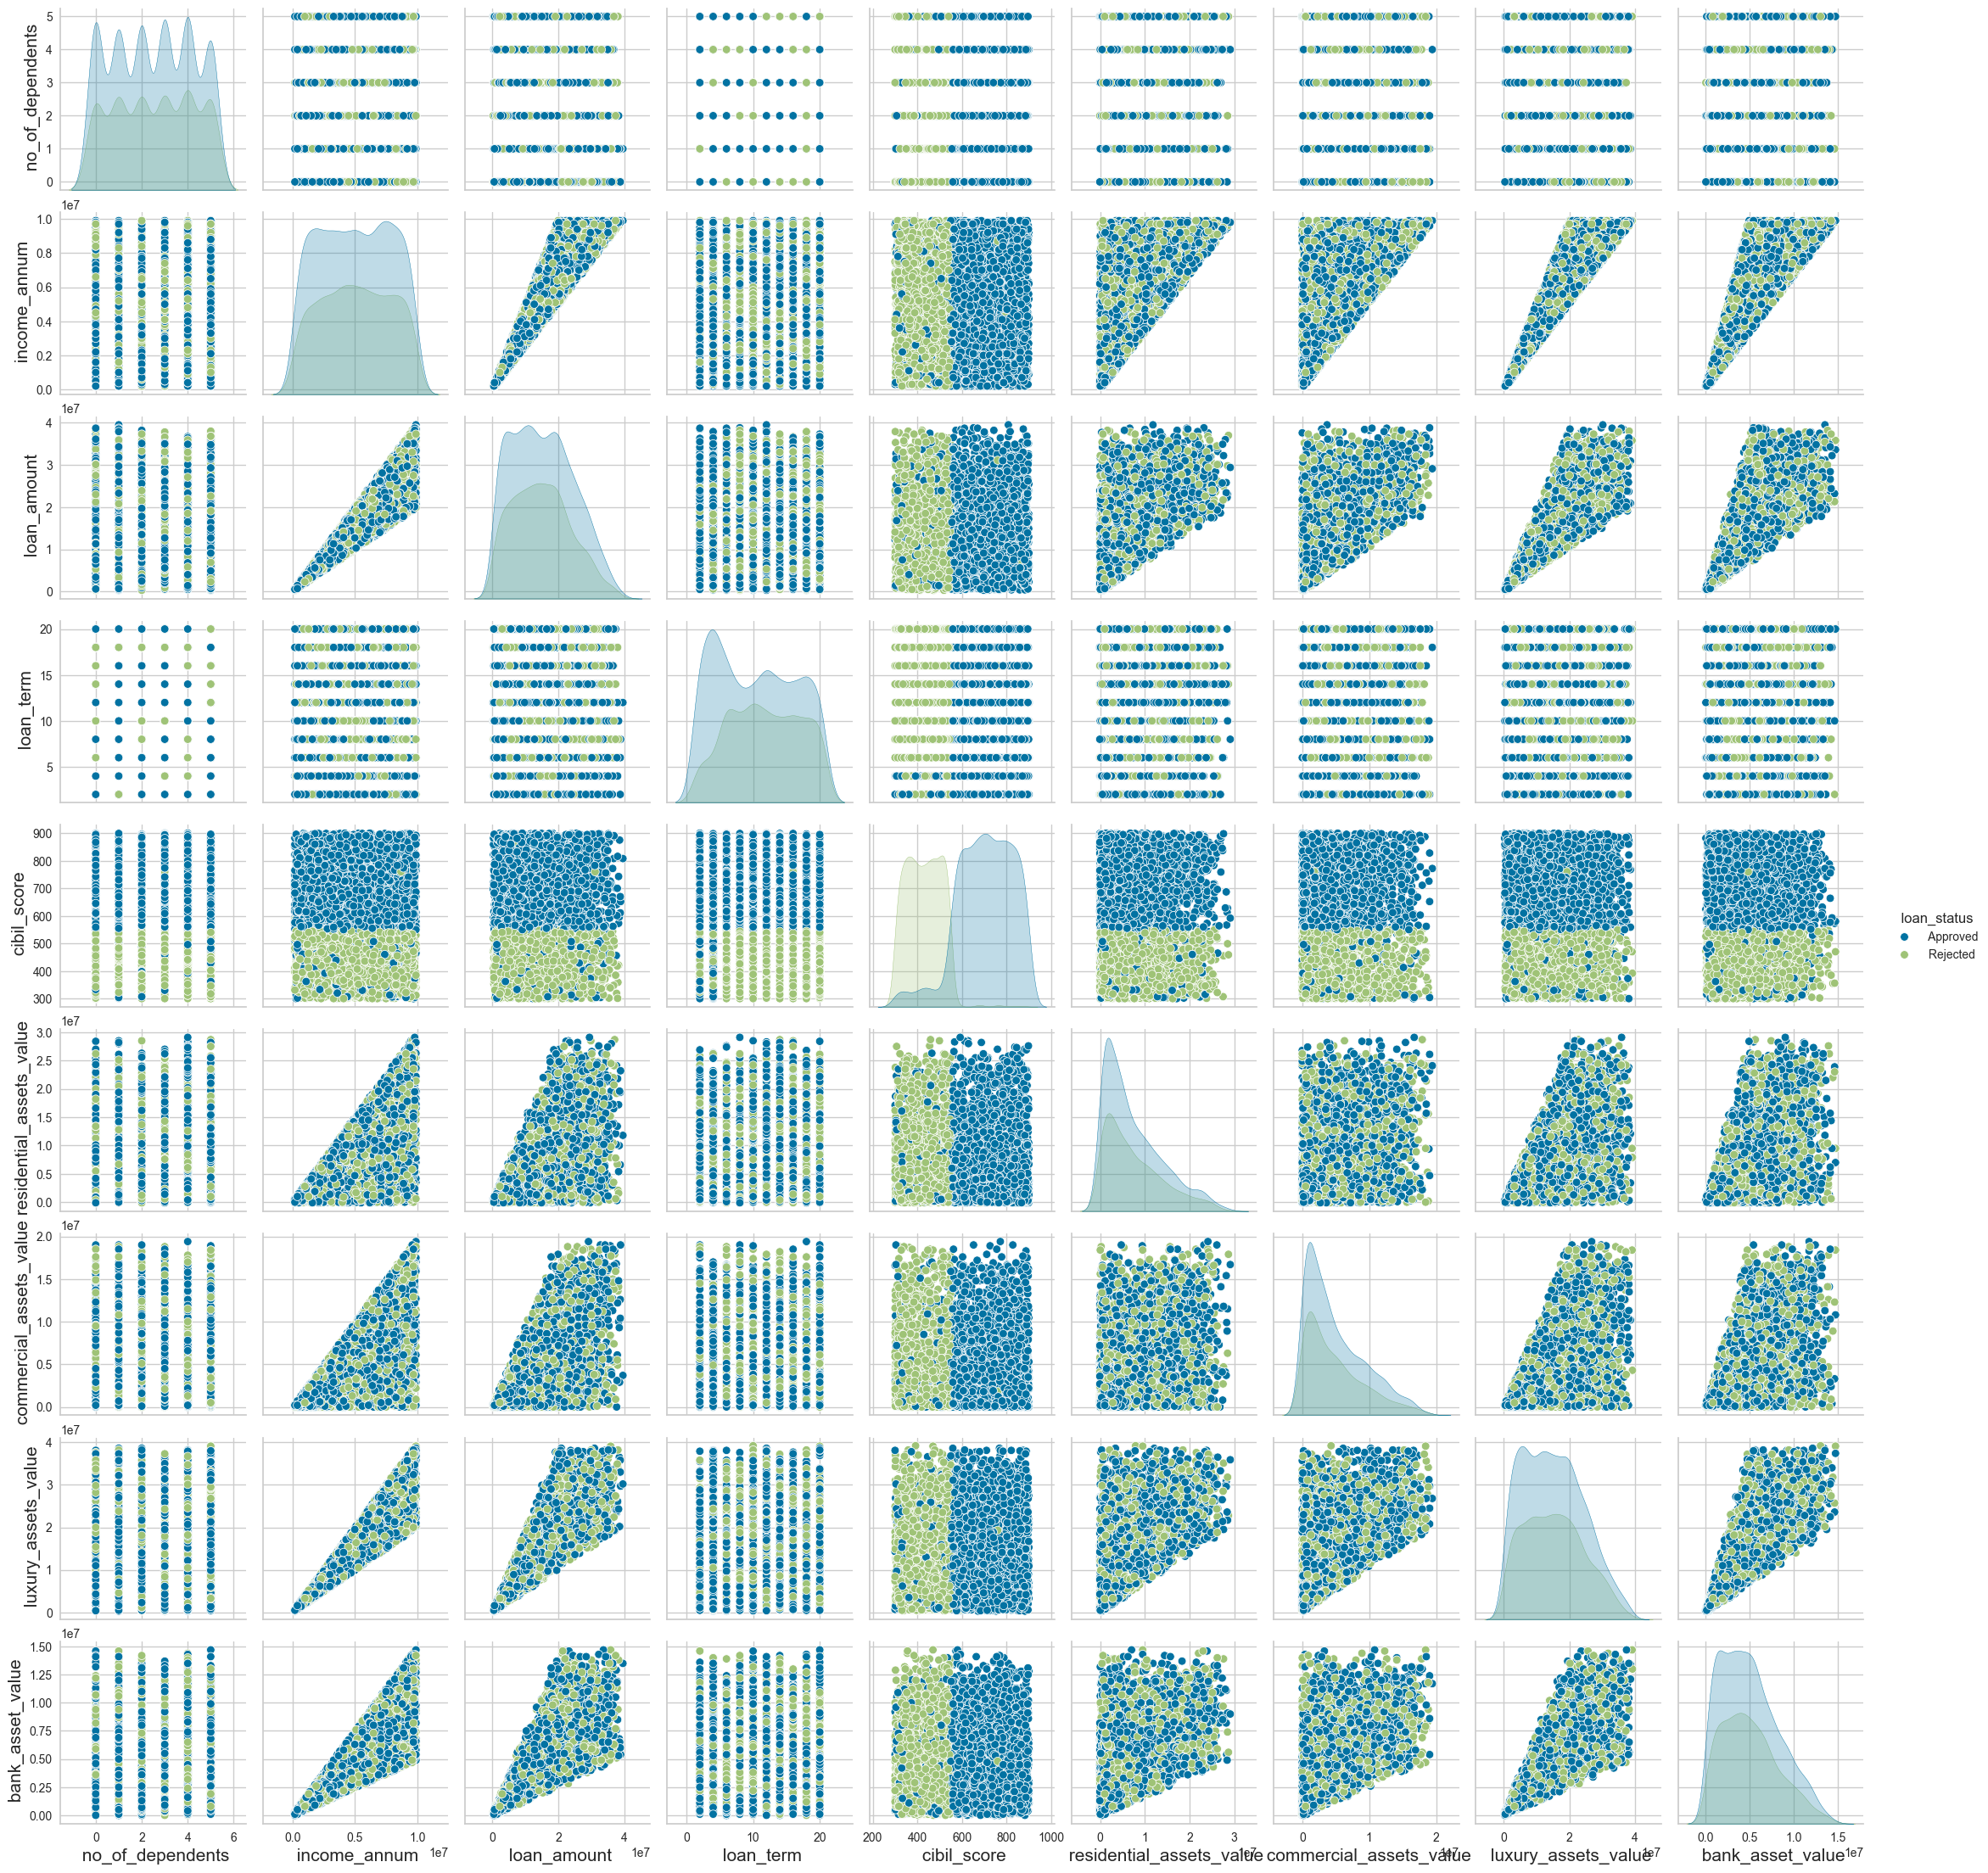

In [166]:
sns.set_context(rc={'axes.labelsize': 15})
sns.pairplot(data = data, hue = ' loan_status')
plt.show()

In [167]:
print(data.columns)


Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [168]:
data.columns = data.columns.str.strip()

In [169]:
print(data['loan_amount'].unique())

[29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000
  2200000  4300000 11200000 22700000 11600000 31500000  7400000 10700000
  1600000  9400000 10300000 14600000 19400000 14000000 25700000  1400000
  9800000  9500000 28100000  5600000 24000000 25300000 12000000 22000000
 11900000  3400000  6200000 27200000  7700000  5100000 18100000 24900000
  2300000 13400000 27800000 19100000 20500000 25400000 24700000  7600000
 23000000 19700000 24500000 10600000 30500000 18400000 18200000 18900000
 28900000  7500000 12300000 29100000 10100000 12400000  5000000  1500000
 18600000 18300000 16700000  8400000  6500000 14800000 33500000 29400000
  8900000 31200000 21200000  8600000  8200000  3800000 28300000  8000000
 37600000 21100000 20700000  6400000  2000000  1100000 25000000 10800000
   900000 12900000  4500000 23600000  9700000 35900000  6800000 22100000
 23400000 23200000 15800000 32900000  3200000 18700000 19500000   600000
   800000  2600000  1200000 20800000 22600000  3600

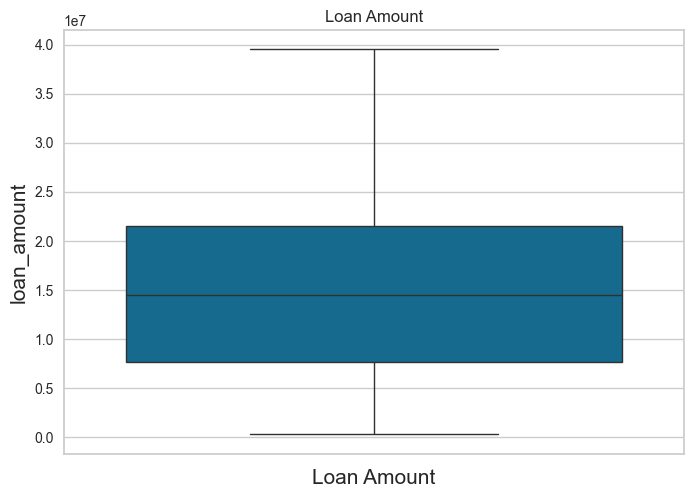

In [170]:
sns.boxplot(data['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

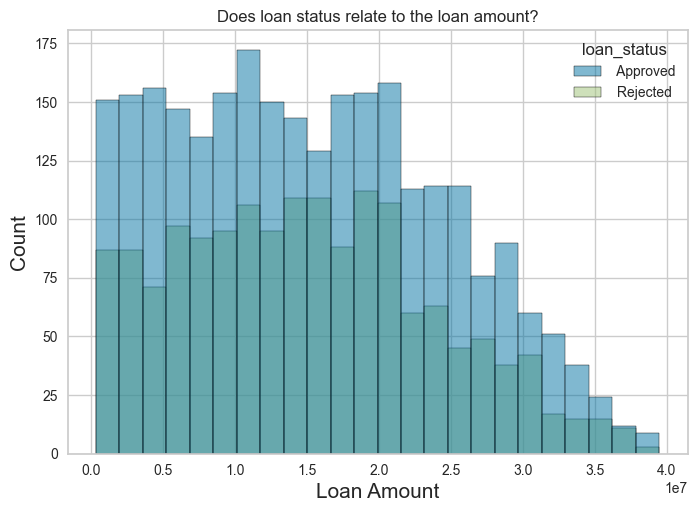

In [171]:
sns.histplot(data, x='loan_amount', hue='loan_status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

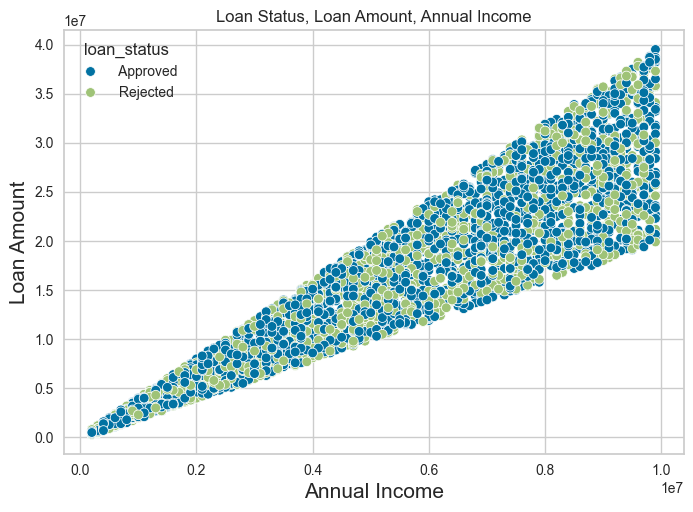

In [172]:
sns.scatterplot(x=data['income_annum'], y= data['loan_amount'], hue=data['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

In [173]:
data.loc[(data['income_annum'] == data['income_annum'].max()) & (data['loan_status'] ==' Rejected')]

no_of_dependents      education self_employed  income_annum  \
loan_id                                                                
83                      2   Not Graduate           Yes       9900000   
158                     5   Not Graduate           Yes       9900000   
1180                    5       Graduate            No       9900000   
1273                    5   Not Graduate            No       9900000   
1410                    3       Graduate           Yes       9900000   
1548                    1       Graduate           Yes       9900000   
1891                    5       Graduate            No       9900000   
2863                    4       Graduate            No       9900000   
2870                    4       Graduate            No       9900000   
3001                    1   Not Graduate           Yes       9900000   
3549                    2   Not Graduate            No       9900000   
4192                    2       Graduate           Yes       9900000   

         loan_amount  loan_term  cibil_score  residential_assets_value  \
loan_id                                                                  
83          21200000         16          363                  25500000   
158         33300000          6          364                   5300000   
1180        35700000         10          392                   7900000   
1273        35800000         20          470                   9500000   
1410        29900000         20          490                  10500000   
1548        34100000         14          371                  24400000   
1891        24600000          2          530                  24200000   
2863        30000000         18          496                  10400000   
2870        26100000          2          481                  14500000   
3001        25700000          2          340                  15600000   
3549        19900000          6          312                  21400000   
4192        37300000          8          385                    600000   

         commercial_assets_value  luxury_assets_value  bank_asset_value  \
loan_id                                                                   
83                      11400000             26600000           6800000   
158                     18700000             27800000           8300000   
1180                     4300000             39200000          13000000   
1273                    18400000             39100000          14700000   
1410                     9100000             27100000           7400000   
1548                     7100000             29300000           6200000   
1891                    12800000             20400000          13000000   
2863                     8000000             29300000          13800000   
2870                     5000000             23600000           9300000   
3001                    18800000             29500000          11800000   
3549                     2200000             31400000          11000000   
4192                      900000             27400000          14200000   

        loan_status  
loan_id              
83         Rejected  
158        Rejected  
1180       Rejected  
1273       Rejected  
1410       Rejected  
1548       Rejected  
1891       Rejected  
2863       Rejected  
2870       Rejected  
3001       Rejected  
3549       Rejected  
4192       Rejected

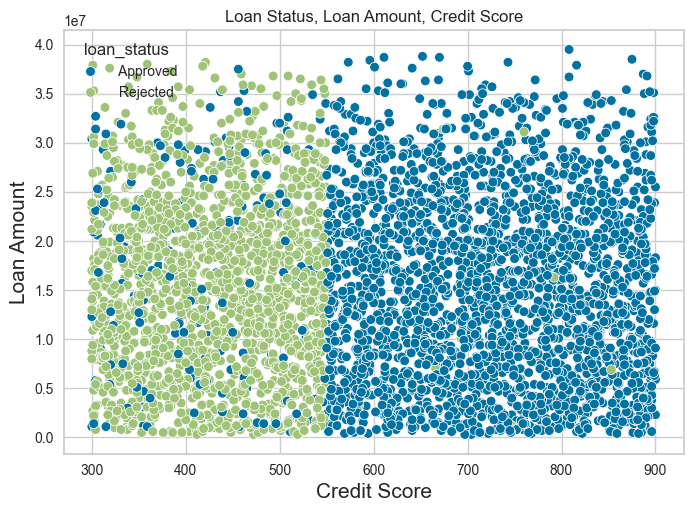

In [174]:
##Credit Score
sns.scatterplot(x=data['cibil_score'], y= data['loan_amount'], hue=data['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

In [175]:
data.loc[(data['cibil_score'] > 740) & (data['loan_status'] ==' Rejected')].sort_values(['cibil_score'], ascending= False)

no_of_dependents      education self_employed  income_annum  \
loan_id                                                                
560                     2       Graduate           Yes        200000   
3528                    0       Graduate            No       1800000   
912                     0       Graduate           Yes       1300000   
3214                    1   Not Graduate           Yes       4300000   
237                     3       Graduate           Yes        900000   
4100                    3       Graduate            No       8700000   
1447                    1       Graduate            No        300000   

         loan_amount  loan_term  cibil_score  residential_assets_value  \
loan_id                                                                  
560           500000          6          885                   -100000   
3528         6900000         10          853                    900000   
912          4800000          4          835                    500000   
3214        16300000         14          792                    400000   
237          3500000          4          770                    700000   
4100        31100000         16          760                    400000   
1447         1200000         18          747                    100000   

         commercial_assets_value  luxury_assets_value  bank_asset_value  \
loan_id                                                                   
560                            0               300000            200000   
3528                      400000              3700000           1700000   
912                       100000              3300000            800000   
3214                      400000             10200000           4000000   
237                            0              2000000            600000   
4100                     1800000             19300000           4800000   
1447                           0               700000            200000   

        loan_status  
loan_id              
560        Rejected  
3528       Rejected  
912        Rejected  
3214       Rejected  
237        Rejected  
4100       Rejected  
1447       Rejected

<function matplotlib.pyplot.show(close=None, block=None)>

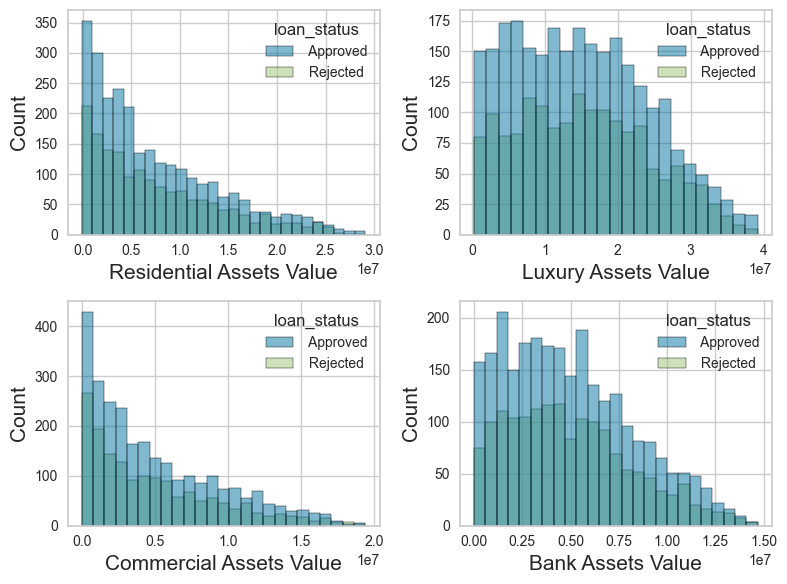

In [176]:
#residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(data, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(data, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(data, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(data, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show

In [177]:
loan_asset = data[['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'loan_status']]
loan_asset_corr = loan_asset.corr()

<AxesSubplot: >

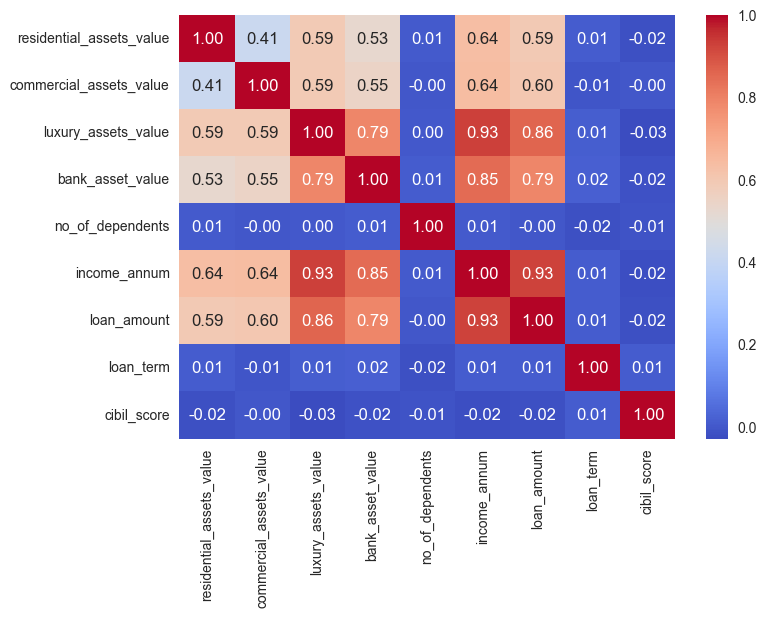

In [178]:
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")

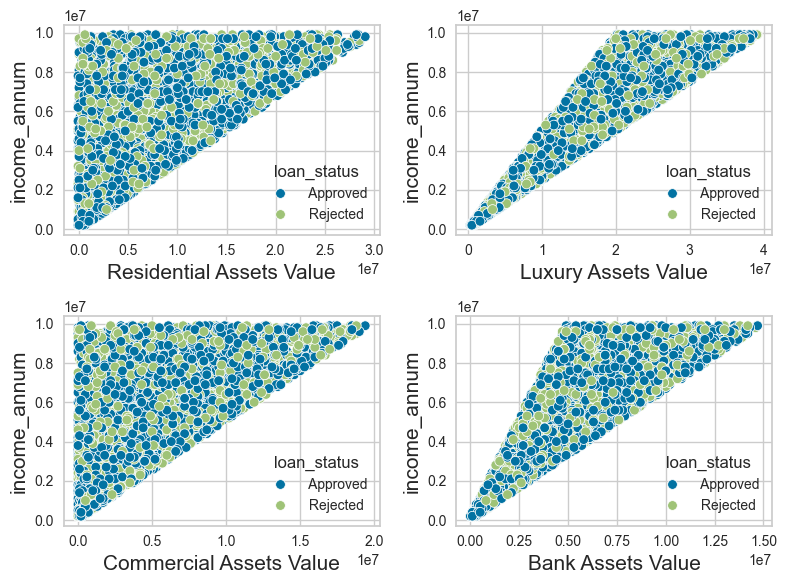

In [179]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(data, x = 'residential_assets_value', y= 'income_annum', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(data, x = 'commercial_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
sns.scatterplot(data, x = 'luxury_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")

sns.scatterplot(data, x = 'bank_asset_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()

In [180]:
##loan term
cross_loan_term = pd.crosstab(index=data['loan_term'], columns=data['loan_status'])
cross_loan_term['Total'] = cross_loan_term[' Approved'] + cross_loan_term[' Rejected'] 
cross_loan_term['Approved_percentage'] = (cross_loan_term[' Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term[' Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status   Approved   Rejected  Total  Approved_percentage  \
loan_term                                                       
2                  315         89    404            77.970297   
4                  366         81    447            81.879195   
6                  282        208    490            57.551020   
8                  220        166    386            56.994819   
10                 229        207    436            52.522936   
12                 276        180    456            60.526316   
14                 239        166    405            59.012346   
16                 236        176    412            57.281553   
18                 257        165    422            60.900474   
20                 236        175    411            57.420925   

loan_status  Rejected_percentage  
loan_term                         
2                      22.029703  
4                      18.120805  
6                      42.448980  
8                      43.005181  
10                     47.477064  
12                     39.473684  
14                     40.987654  
16                     42.718447  
18                     39.099526  
20                     42.579075

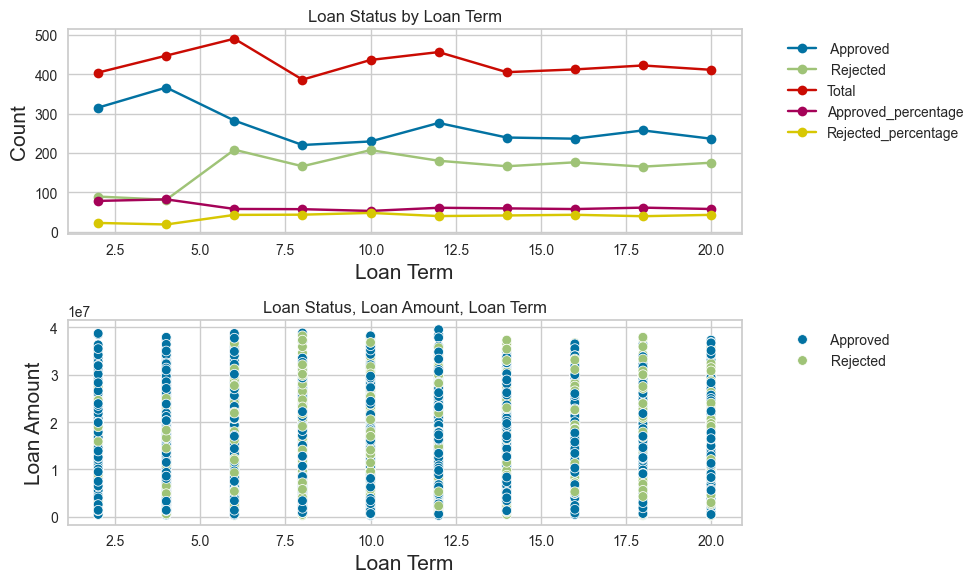

In [181]:
fig,axes = plt.subplots(2,1, figsize=(10,6))
cross_loan_term.plot(kind='line', marker='o', ax = axes[0])
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Count')
axes[0].set_title('Loan Status by Loan Term')
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

sns.scatterplot(data, x = 'loan_term', y = 'loan_amount', hue = 'loan_status', ax = axes[1])
axes[1].set_title("Loan Status, Loan Amount, Loan Term")
axes[1].set_xlabel("Loan Term")
axes[1].set_ylabel("Loan Amount")
axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()


In [182]:
data.loc[(data['loan_term'] <=4) & (data['loan_status'] ==0)].sort_values(['loan_amount']).head(10)

Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []

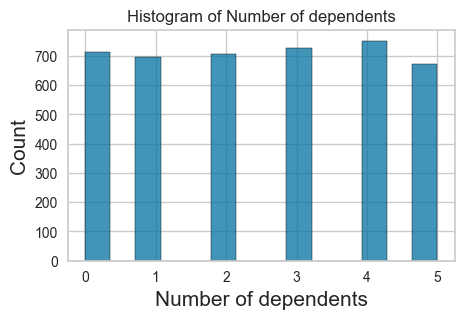

In [183]:
##number of dependents
plt.figure(figsize = (5,3))
sns.histplot(data['no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

In [184]:
cross_dependents = pd.crosstab(index=data['no_of_dependents'], columns=data['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents[' Approved']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents[' Rejected']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents

loan_status        Approved   Rejected  Approved_percentage  \
no_of_dependents                                              
0                       457        255            64.185393   
1                       430        267            61.692970   
2                       441        267            62.288136   
3                       457        270            62.861073   
4                       465        287            61.835106   
5                       406        267            60.326895   

loan_status       Rejected_percentage  
no_of_dependents                       
0                           35.814607  
1                           38.307030  
2                           37.711864  
3                           37.138927  
4                           38.164894  
5                           39.673105

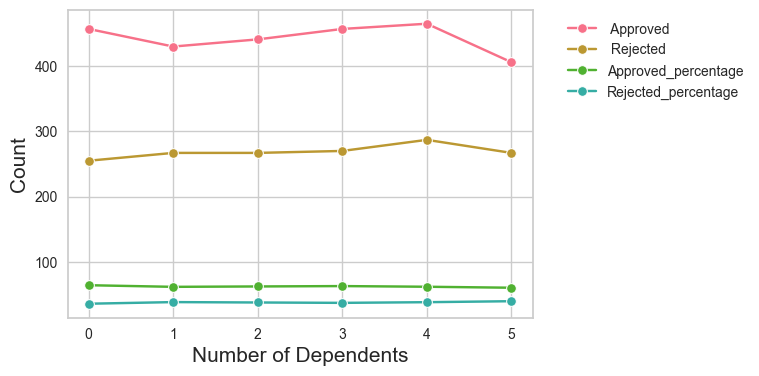

In [185]:
palette = sns.color_palette("husl")

plt.figure(figsize = (6,4))
sns.lineplot(data=cross_dependents, dashes=False, markers="o", palette=palette)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

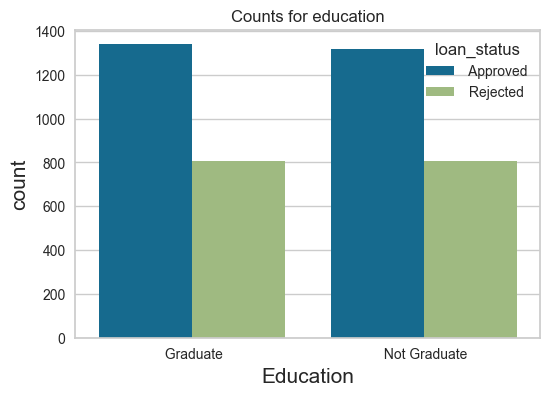

In [186]:
#education
plt.figure(figsize = (6,4))
sns.countplot(data, x='education', hue='loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

In [187]:
education = data.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

education

education  count_by_education  median_annual_income  \
0       Graduate                2144             5100000.0   
1   Not Graduate                2125             5000000.0   

   average_loan_amount  average_credit_score  average_loan_term  \
0          15229151.12                599.14              10.85   
1          15036894.12                600.74              10.95   

   avg_residential_value  avg_commerical_value  avg_luxury_value  \
0             7543376.87            4943610.07       15239319.03   
1             7401223.53            5002964.71       15012282.35   

   avg_bank_value  
0      5007182.84  
1      4945929.41

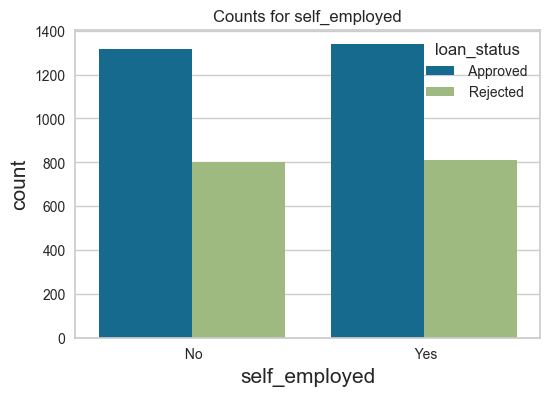

In [188]:
plt.figure(figsize = (6,4))
sns.countplot(data, x='self_employed', hue='loan_status')
plt.xlabel("self_employed")
plt.title("Counts for self_employed")

plt.show()

In [189]:
##self employed
self_employed = data.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)
self_employed

self_employed  count  median_annual_income  average_loan_amount  \
0            No   2119             5100000.0          15120245.40   
1           Yes   2150             5100000.0          15146465.12   

   average_credit_score  average_loan_term  avg_residential_value  \
0                600.78              10.88             7432373.76   
1                599.10              10.92             7512279.07   

   avg_commerical_value  avg_luxury_value  avg_bank_value  
0            5052713.54       15085842.38       4977395.0  
1            4894744.19       15166186.05       4976000.0

In [190]:
##select_dtypes(include=['O']).columns: This method is used to select columns from the DataFrame based on their data types. In this case, it is specifying include=['O'], which means it is selecting columns with object data type. Object data type is often used to represent string or categorical data in pandas.

cat_vars = data.select_dtypes(include = ['O']).columns
cat_vars

Index(['education', 'self_employed', 'loan_status'], dtype='object')

In [191]:
dummy = pd.get_dummies(data[cat_vars],drop_first = True,dtype = 'int')


In [192]:
##axis=0 refers to operations along the rows (vertical axis).
##axis=1 refers to operations along the columns (horizontal axis).
data = data.drop(cat_vars,axis =1)

In [193]:
data = pd.concat([data,dummy],axis = 1)
data.head()


no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
loan_id                                                                        
1                       2       9600000     29900000         12          778   
2                       0       4100000     12200000          8          417   
3                       3       9100000     29700000         20          506   
4                       3       8200000     30700000          8          467   
5                       5       9800000     24200000         20          382   

         residential_assets_value  commercial_assets_value  \
loan_id                                                      
1                         2400000                 17600000   
2                         2700000                  2200000   
3                         7100000                  4500000   
4                        18200000                  3300000   
5                        12400000                  8200000   

         luxury_assets_value  bank_asset_value  education_ Not Graduate  \
loan_id                                                                   
1                   22700000           8000000                        0   
2                    8800000           3300000                        1   
3                   33300000          12800000                        0   
4                   23300000           7900000                        0   
5                   29400000           5000000                        1   

         self_employed_ Yes  loan_status_ Rejected  
loan_id                                             
1                         0                      0  
2                         1                      1  
3                         0                      1  
4                         0                      1  
5                         1                      1

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [196]:
data.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_ Not Graduate',
       'self_employed_ Yes', 'loan_status_ Rejected'],
      dtype='object')

In [197]:
X = data
calc_vif(X)

variables        VIF
0           no_of_dependents   3.048003
1               income_annum  75.549918
2                loan_amount  27.404609
3                  loan_term   4.750344
4                cibil_score   7.970685
5   residential_assets_value   3.910599
6    commercial_assets_value   3.883780
7        luxury_assets_value  27.543440
8           bank_asset_value  12.161266
9    education_ Not Graduate   1.962193
10        self_employed_ Yes   1.975802
11     loan_status_ Rejected   1.980462

In [198]:
data['Assets']=data[['residential_assets_value', 'commercial_assets_value',
                     'luxury_assets_value','bank_asset_value']].mean(axis=1).reset_index().iloc[:,1]

In [199]:
data = data.drop(['residential_assets_value', 'commercial_assets_value',
                  'luxury_assets_value','bank_asset_value'],axis = 1)
data.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
loan_id                                                                        
1                       2       9600000     29900000         12          778   
2                       0       4100000     12200000          8          417   
3                       3       9100000     29700000         20          506   
4                       3       8200000     30700000          8          467   
5                       5       9800000     24200000         20          382   

         education_ Not Graduate  self_employed_ Yes  loan_status_ Rejected  \
loan_id                                                                       
1                              0                   0                      0   
2                              1                   1                      1   
3                              0                   0                      1   
4                              0                   0                      1   
5                              1                   1                      1   

             Assets  
loan_id              
1         4250000.0  
2        14425000.0  
3        13175000.0  
4        13750000.0  
5         8475000.0

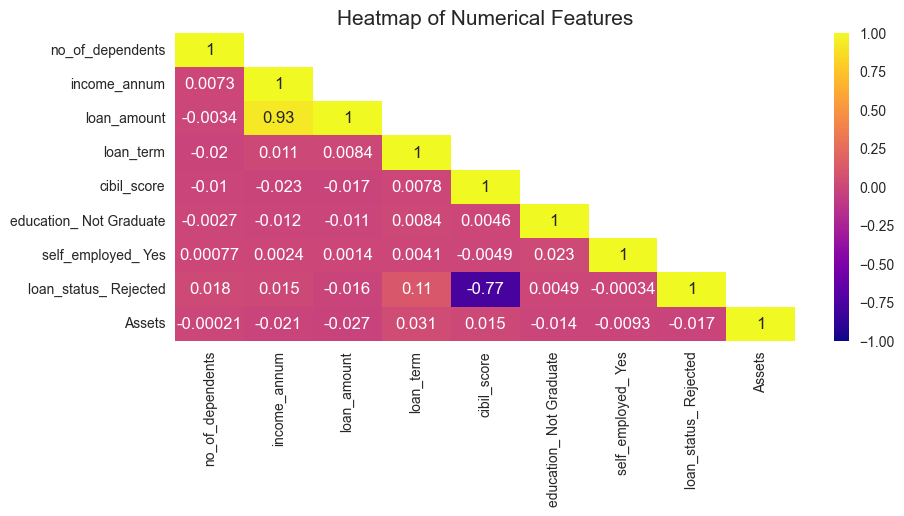

In [200]:
cor = data.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=1, cmap='plasma')
plt.title("Heatmap of Numerical Features", fontsize=15)
plt.show()

In [201]:
data = data.drop([4269],axis=0)

In [202]:
data.isnull().sum()

no_of_dependents           0
income_annum               0
loan_amount                0
loan_term                  0
cibil_score                0
education_ Not Graduate    0
self_employed_ Yes         0
loan_status_ Rejected      0
Assets                     0
dtype: int64


### MODEL BUILDING


                

In [210]:
print(data.columns)

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'education_ Not Graduate', 'self_employed_ Yes',
       'loan_status_ Rejected', 'Assets'],
      dtype='object')


In [212]:
Y = data['loan_status_ Rejected']
X = data.drop('loan_status_ Rejected',axis = 1)

In [213]:
# X là tập dữ liệu đầu vào, Y là tập dữ liệu đầu ra (nhãn)
# test_size là tỷ lệ của dữ liệu sẽ được chia vào tập kiểm thử, ở đây là 20%
# random_state là một số nguyên để đảm bảo rằng mỗi lần chạy sẽ tạo ra phân chia giống nhau
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 23)

In [214]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [215]:
# Áp dụng phương thức fit_transform() lên tập huấn luyện
X_train = ss.fit_transform(X_train)
# Áp dụng các tham số đã học từ tập huấn luyện lên tập kiểm thử
X_test = ss.transform(X_test)

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

In [217]:
folds = 5
param_grid = {
    'max_depth': [3,8,1],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,1000, 150], 
    'max_features': [5, 10, 1]
}
#n_jobs: Số lượng công việc được thực hiện song song trong quá trình tìm kiếm. 
# Nếu bạn đặt n_jobs = -1, nó sẽ sử dụng tất cả các CPU có sẵn để thực hiện công việc.

#verbose: Cấp độ chi tiết của tiến trình in ra. Trong trường hợp verbose = 1, 
# nó sẽ in ra thông tin về mỗi lần thử nghiệm tham số.

#return_train_score: Nếu đặt là True, kết quả của các bộ tham số trên tập huấn luyện cũng sẽ được trả về.
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1, return_train_score=True)

In [218]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': [5, 10, 1],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, verbose=1)

In [219]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
#điều này có nghĩa là mỗi nút sẽ chỉ sử dụng một đặc trưng để thực hiện phép chia

We can get accuracy of 0.9674877524119484 using {'max_depth': 8, 'max_features': 1, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 1000}


In [220]:
rfc = RandomForestClassifier(criterion = 'entropy',
                            bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=1,
                             n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=1,
                       min_samples_leaf=100, min_samples_split=200)

In [221]:
y_pred = rfc.predict(X_test)

In [222]:
#classification_report và confusion_matrix là hai công cụ quan trọng từ thư viện 
#sklearn.metrics giúp đánh giá hiệu suất của mô hình phân loại trên dữ liệu kiểm thử
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

##Precision đo lường tỷ lệ các dự đoán positive mà mô hình đưa ra là thực sự positive.
##Recall đo lường tỷ lệ các mẫu positive thực sự mà mô hình dự đoán đúng.
##F1-Score là sự kết hợp của Precision và Recall, giúp đánh giá hiệu suất tổng thể của mô hình.
##Support là số lượng mẫu thực tế thuộc mỗi lớp.

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       541
           1       0.92      0.98      0.95       313

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



In [223]:
setup(data=X,target=Y)
best_model=compare_models()




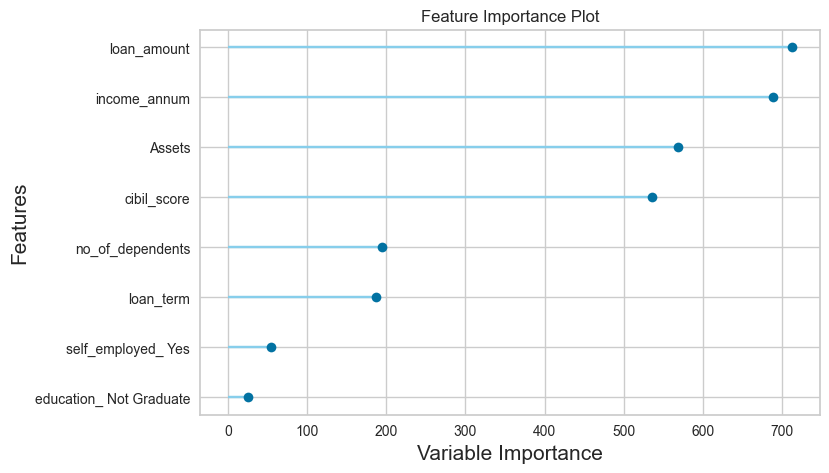

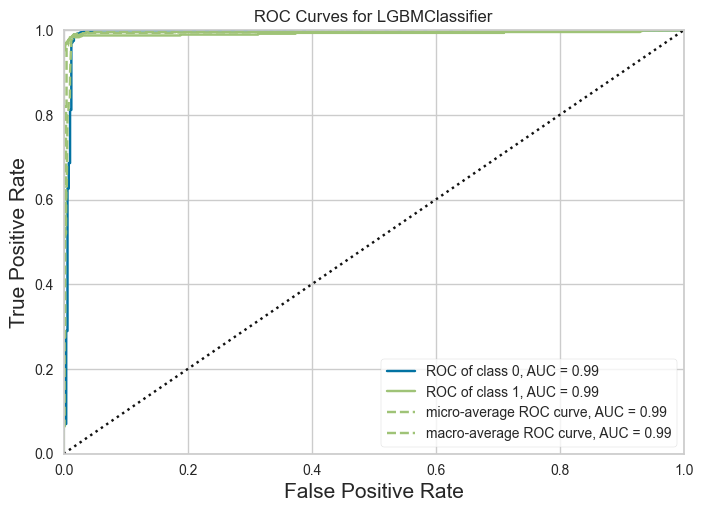

In [224]:
# Vẽ biểu đồ tính năng của mô hình tốt nhất
plot_model(estimator = best_model, plot = "feature")
plot_model(best_model)

#Nếu AUC = 1, đồng nghĩa với việc mô hình có thể phân loại hoàn hảo giữa các lớp 
# và không có False Positive hoặc False Negative nào.
# đường ... là random line ( better - worse)

In [225]:
lightgbm_model = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm_model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [226]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [227]:
save_model(tuned_lightgbm, 'Loan_approval_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['no_of_dependents', 'income_annum',
                                              'loan_amount', 'loan_term',
                                              'cibil_score',
                                              'education_ Not Graduate',
                                              'self_employed_ Yes', 'Assets'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=na...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
               